In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 6.3MB/s 
     |████████████████████████████████| 15.3MB 357kB/s 
     |████████████████████████████████| 6.5MB 52.1MB/s 


In [ ]:
import pandas as pd

In [ ]:
import geopandas as gpd
states=gpd.read_file('/content/drive/MyDrive/Final_Hack/india_administrative_state_boundary/india_administrative_state_boundary.shp')


In [ ]:
pred=pd.read_csv('/content/drive/MyDrive/Final_Hack/submission_result.csv')


In [ ]:
geolocations=pd.read_csv('/content/drive/MyDrive/Final_Hack/geolocations.csv')

In [ ]:
pred.drop(['perishable_x','perishable_y','class','id','locationId','onpromotion','date','Unnamed: 0'],axis=1,inplace=True)

In [ ]:
#pred.drop(['date','Unnamed: 0'],axis=1,inplace=True)
pred.state.unique()

array(['Uttar Pradesh', 'Karnataka', 'NCR', 'West Bengal', 'Chimborazo',
       'Gujarat', 'Madhya Pradesh', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Andhra Pradesh', 'Telangana', 'Bihar'], dtype=object)

In [ ]:
new_row=pd.DataFrame({'Address':['Patna,Bihar','Vizag,Andhra Pradesh','C,Chimborazo'],
         'Lat':['25.5941','15.9129','1.4693'],
         'Long':['85.1376','79.7400','78.8169'],
         'state':['Bihar','Andhra Pradesh','Chimborazo']})
geolocations=geolocations.append(new_row)
#geolocations['state']=geolocations['Address'].str.split(',').str[-1]
geolocations

,level_0,index,Address,Lat,Long,state
0,0.0,0.0,"Kanpur,Uttar Pradesh",26.5005,80.2712,Uttar Pradesh
1,1.0,1.0,"Bengaluru,Karnataka",12.9767,77.5753,Karnataka
2,2.0,2.0,"Delhi,NCR",28.7041,77.1025,NCR
3,3.0,3.0,"Gurgaon,Haryana",28.4697,77.0426,Haryana
4,4.0,4.0,"Mumbai,Maharashtra",19.076,72.8777,Maharashtra
5,5.0,5.0,"Mysore,Karnataka",12.2958,76.6394,Karnataka
6,6.0,6.0,"Nagpur,Maharashtra",21.1458,79.0882,Maharashtra
7,7.0,7.0,"Hyderabad,Telangana",17.385,78.4867,Telangana
8,8.0,8.0,"Surat,Gujarat",21.1702,72.8311,Gujarat
9,9.0,9.0,"Pune,Maharashtra",18.5204,73.8567,Maharashtra


In [ ]:

#geolocations.drop(geolocations.tail(6).index,axis=0,inplace=True)
geolocations.drop(['level_0','index'],axis=1,inplace=True)
geolocations.reset_index(inplace=True)

In [ ]:
statewise_sales=pred.groupby(['state','type','cluster'])['unit_sales'].sum().to_frame().reset_index()

In [ ]:
result=pd.merge(statewise_sales,geolocations,left_on='state',right_on='state',how='left')

In [ ]:
result.dtypes

state          object
type           object
cluster         int64
unit_sales    float64
index           int64
Address        object
Lat            object
Long           object
dtype: object

In [ ]:
#result['date']=pd.to_datetime(result['date'])
#result['locationId']=result['locationId'].astype('category')
#result['item_id']=result['item_id'].astype('category')
#result['city']=result['city'].astype('category')
result['state']=result['state'].astype('category')
result['type']=result['type'].astype('category')
#result['category_of_item']=result['category_of_item'].astype('category')
#result['class']=result['class'].astype('category')

# geolocations['Lat']=geolocations['Lat'].astype('category')
# geolocations['Long']=geolocations['Long'].astype('category')



In [ ]:
ss=pred[['state','unit_sales']]

In [ ]:
states['st_nm']=states['st_nm'].replace(['NCT of Delhi'],'NCR')

In [ ]:
pp=ss.groupby('state')['unit_sales'].sum()

In [ ]:
ss.groupby('state')['unit_sales'].sum().sort_values(ascending=False)

state
Karnataka         5.516850e+07
Maharashtra       1.799863e+07
Telangana         5.872851e+06
Uttar Pradesh     5.127379e+06
NCR               4.546774e+06
Haryana           4.356383e+06
Gujarat           4.254339e+06
Tamil Nadu        2.972850e+06
Andhra Pradesh    2.286790e+06
West Bengal       2.216873e+06
Chimborazo        1.283250e+06
Madhya Pradesh    1.235840e+06
Bihar             1.080768e+06
Name: unit_sales, dtype: float64

In [ ]:
gpd_sates=pd.merge(states,pp,left_on='st_nm',right_on='state',how='left')

In [ ]:
gpd_sates.groupby('st_nm')['unit_sales'].sum().sort_values(ascending=False)

st_nm
Karnataka                   5.516850e+07
Maharashtra                 1.799863e+07
Telangana                   5.872851e+06
Uttar Pradesh               5.127379e+06
NCR                         4.546774e+06
Haryana                     4.356383e+06
Gujarat                     4.254339e+06
Tamil Nadu                  2.972850e+06
Andhra Pradesh              2.286790e+06
West Bengal                 2.216873e+06
Madhya Pradesh              1.235840e+06
Bihar                       1.080768e+06
Jammu & Kashmir             0.000000e+00
Dadara & Nagar Havelli      0.000000e+00
Chandigarh                  0.000000e+00
Daman & Diu                 0.000000e+00
Goa                         0.000000e+00
Assam                       0.000000e+00
Arunanchal Pradesh          0.000000e+00
Himachal Pradesh            0.000000e+00
Chhattisgarh                0.000000e+00
Lakshadweep                 0.000000e+00
Jharkhand                   0.000000e+00
Kerala                      0.000000e+00
Uttarakhan

In [ ]:
#result.drop('Address',axis=1,inplace=True)
gpd_sates.drop(['st_nm','tid','territory_','index'],axis=1,inplace=True)

In [ ]:
gpd_sates.dtypes

state           object
type          category
cluster          int64
unit_sales     float64
Address         object
Lat            float32
Long           float32
point         geometry
gid            float64
geometry      geometry
dtype: object

In [ ]:
result['Lat']=result['Lat'].astype('float32')
result['Long']=result['Long'].astype('float32')

In [ ]:
result['point']=list(zip(result['Long'],result['Lat']))

In [ ]:
result['point']

0           (26.500490000000003, 80.271233)
1                        (26.8467, 80.9462)
2           (26.500490000000003, 80.271233)
3                        (26.8467, 80.9462)
4           (26.500490000000003, 80.271233)
                         ...               
46892030                 (25.5941, 85.1376)
46892031                 (25.5941, 85.1376)
46892032                 (25.5941, 85.1376)
46892033                 (25.5941, 85.1376)
46892034                 (25.5941, 85.1376)
Name: point, Length: 46892035, dtype: object

In [ ]:
!pip install shapely

In [ ]:
from shapely.geometry import Point

In [ ]:
result['point']=result['point'].apply(Point)

In [ ]:
result.drop(['date','city'],axis=1,inplace=True)

In [ ]:
sales_gpd=gpd.GeoDataFrame(result,geometry='point')

In [ ]:
sales_gpd.head()

,item_id,city,state,type,cluster,category_of_item,unit_sales,Lat,Long,point
0,item_99197,Kanpur,Uttar Pradesh,D,1,grocery_items,1.999582,26.500490,80.271233,POINT (26.50049 80.27123)
1,item_99197,Kanpur,Uttar Pradesh,D,1,grocery_items,1.999582,26.846701,80.946198,POINT (26.84670 80.94620)
2,item_103665,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,2.204405,26.500490,80.271233,POINT (26.50049 80.27123)
3,item_103665,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,2.204405,26.846701,80.946198,POINT (26.84670 80.94620)
4,item_105574,Kanpur,Uttar Pradesh,D,1,grocery_items,6.419739,26.500490,80.271233,POINT (26.50049 80.27123)


In [ ]:
!pip install mapclassify

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:642: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


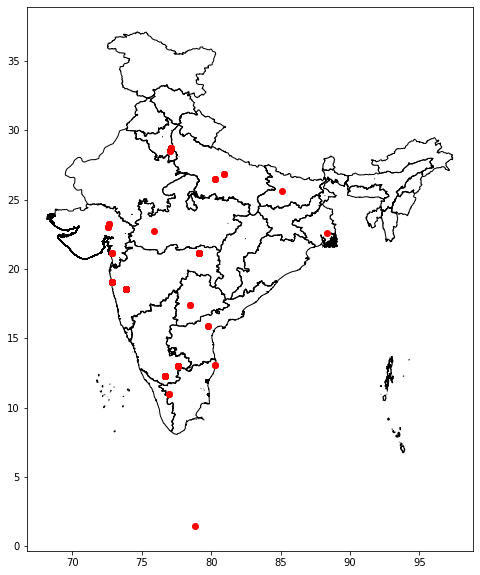

In [ ]:
import mapclassify as mc
import matplotlib.pyplot as plt

ax=states.plot(edgecolor='k',facecolor='none',figsize=(20,10))
sales_gpd.plot(column='unit_sales',ax=ax,color='red')

In [ ]:
pred.groupby('state')['unit_sales'].sum().sort_values(ascending=False)

state
Karnataka         5.516850e+07
Maharashtra       1.799863e+07
Telangana         5.872851e+06
Uttar Pradesh     5.127379e+06
NCR               4.546774e+06
Haryana           4.356383e+06
Gujarat           4.254339e+06
Tamil Nadu        2.972850e+06
Andhra Pradesh    2.286790e+06
West Bengal       2.216873e+06
Chimborazo        1.283250e+06
Madhya Pradesh    1.235840e+06
Bihar             1.080768e+06
Name: unit_sales, dtype: float64

In [ ]:
gpd_sates

,gid,st_nm,tid,territory_,geometry,unit_sales,sales_category
0,1,Andaman & Nicobar Island,None,None,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",0.000000e+00,Zero sales
1,2,Arunanchal Pradesh,None,None,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",0.000000e+00,Zero sales
2,3,Assam,None,None,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",0.000000e+00,Zero sales
3,4,Bihar,None,None,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",1.080768e+06,Low sales
4,5,Chandigarh,None,None,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",0.000000e+00,Zero sales
5,6,Chhattisgarh,None,None,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",0.000000e+00,Zero sales
6,7,Dadara & Nagar Havelli,None,None,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",0.000000e+00,Zero sales
7,8,Daman & Diu,None,None,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",0.000000e+00,Zero sales
8,9,Goa,None,None,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",0.000000e+00,Zero sales
9,10,Gujarat,None,None,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",4.254339e+06,Medium sales


In [ ]:
gpd_sates['sales_category']=pd.cut(gpd_sates['unit_sales'],[-1,1000,2300000,4500000,65000000],labels=['Zero sales','Low sales','Medium sales','High sales'])

In [ ]:
gpd_sates['unit_sales']=gpd_sates['unit_sales'].fillna(0)

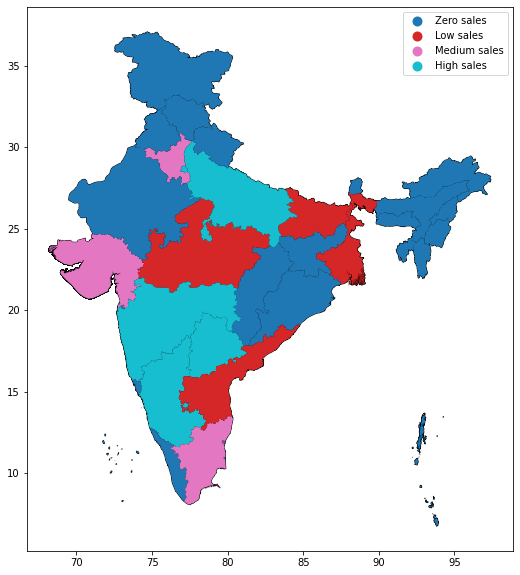

In [ ]:
import mapclassify as mc
import matplotlib.pyplot as plt

ax=states.plot(edgecolor='k',facecolor='none',figsize=(20,10))
gpd_sates.plot(column='sales_category',ax=ax,legend=True,k=4)

In [ ]:
cities=gpd.read_file('/content/drive/MyDrive/Final_Hack/IND_adm/IND_adm2.shp')

In [ ]:
cities[cities['NAME_2']=='Gandhinagar']

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
120,105,IND,India,12,Gujarat,121,Gandhinagar,District,District,None,None,"POLYGON ((72.57260 23.40600, 72.57904 23.40577..."


In [ ]:
city_sales=pred.groupby('city')['unit_sales'].sum().sort_values(ascending=False).reset_index()

In [ ]:
sales_citywise=pd.merge(city_sales,geolocations,left_on='city',right_on='City',how='left')

In [ ]:
sales_citywise.shape

(22, 5)

In [ ]:
geolocations

,Address,Lat,Long
0,"Kanpur,Uttar Pradesh",26.500490,80.271233
1,"Bengaluru,Karnataka",12.976750,77.575279
2,"Delhi,NCR",28.704100,77.102500
3,"Gurgaon,Haryana",28.469709,77.042641
4,"Mumbai,Maharashtra",19.076000,72.877700
5,"Mysore,Karnataka",12.295800,76.639400
6,"Nagpur,Maharashtra",21.145800,79.088200
7,"Hyderabad,Telangana",17.385000,78.486700
8,"Surat,Gujarat",21.170200,72.831100
9,"Pune,Maharashtra",18.520400,73.856700


In [ ]:
geolocations['City']=geolocations.Address.str.split(",",expand=True)[0]
geolocations

,Address,Lat,Long,City
0,"Kanpur,Uttar Pradesh",26.500490,80.271233,Kanpur
1,"Bengaluru,Karnataka",12.976750,77.575279,Bengaluru
2,"Delhi,NCR",28.704100,77.102500,Delhi
3,"Gurgaon,Haryana",28.469709,77.042641,Gurgaon
4,"Mumbai,Maharashtra",19.076000,72.877700,Mumbai
5,"Mysore,Karnataka",12.295800,76.639400,Mysore
6,"Nagpur,Maharashtra",21.145800,79.088200,Nagpur
7,"Hyderabad,Telangana",17.385000,78.486700,Hyderabad
8,"Surat,Gujarat",21.170200,72.831100,Surat
9,"Pune,Maharashtra",18.520400,73.856700,Pune


In [ ]:
new_row=pd.DataFrame({'Address':['Noida','Visakhapatnam','Vijayawada','Patna','Guntur'],
         'Lat':['28.5355','17.6868','16.5062','25.5941','16.3067'],
         'Long':['77.3910','83.2185','80.6480','85.1376','80.4365'],
         'City':['Noida','Visakhapatnam','Vijayawada','Patna','Guntur']})
geolocations=geolocations.append(new_row)
#geolocations['state']=geolocations['Address'].str.split(',').str[-1]
geolocations

,Address,Lat,Long,City
0,"Kanpur,Uttar Pradesh",26.5005,80.2712,Kanpur
1,"Bengaluru,Karnataka",12.9767,77.5753,Bengaluru
2,"Delhi,NCR",28.7041,77.1025,Delhi
3,"Gurgaon,Haryana",28.4697,77.0426,Gurgaon
4,"Mumbai,Maharashtra",19.076,72.8777,Mumbai
5,"Mysore,Karnataka",12.2958,76.6394,Mysore
6,"Nagpur,Maharashtra",21.1458,79.0882,Nagpur
7,"Hyderabad,Telangana",17.385,78.4867,Hyderabad
8,"Surat,Gujarat",21.1702,72.8311,Surat
9,"Pune,Maharashtra",18.5204,73.8567,Pune


In [ ]:
geolocations.drop('index',axis=1,inplace=True)
#geolocations.reset_index(inplace=True)
geolocations

,Lat,Long,City
0,26.5005,80.2712,Kanpur
1,12.9767,77.5753,Bengaluru
2,28.7041,77.1025,Delhi
3,28.4697,77.0426,Gurgaon
4,19.076,72.8777,Mumbai
5,12.2958,76.6394,Mysore
6,21.1458,79.0882,Nagpur
7,17.385,78.4867,Hyderabad
8,21.1702,72.8311,Surat
9,18.5204,73.8567,Pune


In [ ]:

geolocations['City']=geolocations.Address.str.split(",",expand=True)[0]
geolocations


,Address,Lat,Long,City
0,"Kanpur,Uttar Pradesh",26.500490,80.271233,Kanpur
1,"Bengaluru,Karnataka",12.976750,77.575279,Bengaluru
2,"Delhi,NCR",28.704100,77.102500,Delhi
3,"Gurgaon,Haryana",28.469709,77.042641,Gurgaon
4,"Mumbai,Maharashtra",19.076000,72.877700,Mumbai
5,"Mysore,Karnataka",12.295800,76.639400,Mysore
6,"Nagpur,Maharashtra",21.145800,79.088200,Nagpur
7,"Hyderabad,Telangana",17.385000,78.486700,Hyderabad
8,"Surat,Gujarat",21.170200,72.831100,Surat
9,"Pune,Maharashtra",18.520400,73.856700,Pune


In [ ]:
import folium

In [ ]:
folium.map(location='India')

TypeError: ignored

In [ ]:
# center_lat = state_wise_census.mean().Latitude
# center_long = state_wise_census.mean().Longitude

m = folium.Map(location=[20.5937, 78.9629], zoom_start=4.5)

for i in range(0,22):

    
    folium.CircleMarker(
        location=[sales_citywise.Lat.values[i], sales_citywise.Long.values[i]],
        radius = float(sales_citywise["unit_sales"].values[i]/1e6),
        popup="sales 2019 : %s"%sales_citywise["unit_sales"].values[i],
        tooltip = sales_citywise.City.values[i],
        color="red",
        fill_color="black"
    ).add_to(m)

m

RecursionError: ignored

In [ ]:
list(range(0,22))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [ ]:
import sys
print(sys.getrecursionlimit())

1000
